In [1]:
%matplotlib inline

In [2]:
df = pd.read_csv("avocado.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date",inplace=True)
df.sort_index(inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

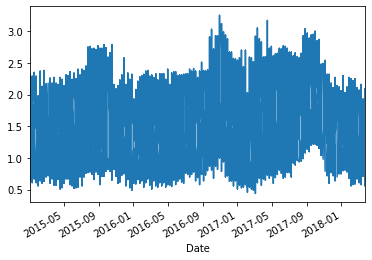

In [3]:
df["AveragePrice"].plot()

In [4]:
df["25ma"] = df["AveragePrice"].rolling(75,min_periods=0).mean()
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,1.750
2015-01-04,51,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,1.620
2015-01-04,51,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,1.640
2015-01-04,51,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,1.610
2015-01-04,51,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,1.616


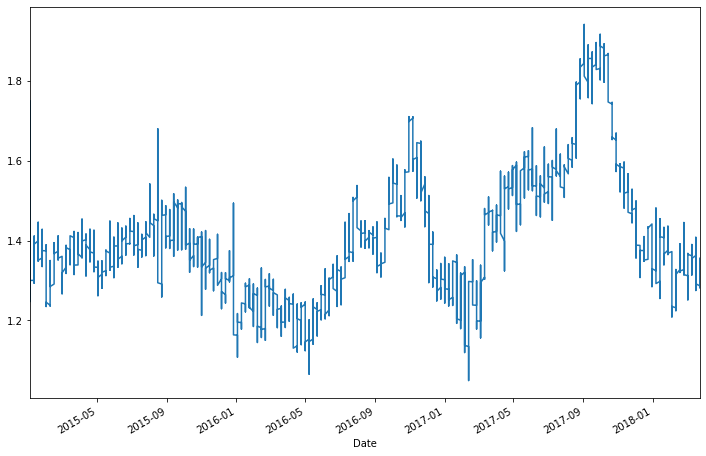

In [5]:
df["25ma"].plot(figsize=(12,8))

In [6]:
df["region"].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [7]:
df1 = pd.read_csv("avocado.csv")
df1 = df1.copy()[df1['type']=='organic']

df1["Date"] = pd.to_datetime(df1["Date"])

df1.sort_values(by="Date", ascending=True, inplace=True)
df1.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.0,organic,2015,LasVegas
10893,51,2015-01-04,1.12,17296.85,14569.66,1868.59,0.00,858.60,830.00,28.60,0.0,organic,2015,PhoenixTucson
9437,51,2015-01-04,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.0,organic,2015,BuffaloRochester
11621,51,2015-01-04,1.30,5782.70,723.29,4221.15,0.00,838.26,223.33,614.93,0.0,organic,2015,Spokane


In [8]:
graph_df = pd.DataFrame()

for region in df1['region'].unique():
    region_df = df1.copy()[df1['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets! (so df rather than series)
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

graph_df.tail()

<IPython.core.display.Javascript object>

,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,...,Houston_price25ma,Chicago_price25ma,Plains_price25ma,Indianapolis_price25ma,SouthCentral_price25ma,Columbus_price25ma,Albany_price25ma,Detroit_price25ma,NewOrleansMobile_price25ma,NewYork_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


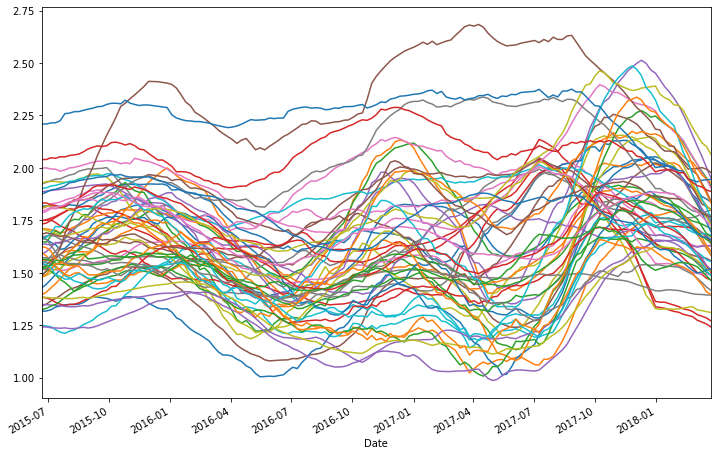

In [12]:
graph_df.dropna().plot(figsize=(12,8),legend=False)